In [2]:
import pandas as pd

In [4]:
# 加载数据，确保将日期解析为日期类型
df = pd.read_csv('sentiment.csv', parse_dates=['date'])

# 查看前几行数据，确认数据加载正确
print(df.head())

        date  sentiment                                     sentiment_dict
0 1996-10-30   0.028881  {'positive': 0.1624157875776291, 'negative': 0...
1 1996-12-04  -0.588398  {'positive': 0.07799529284238815, 'negative': ...
2 1997-01-22   0.123663  {'positive': 0.17666494846343994, 'negative': ...
3 1997-03-12  -0.728463  {'positive': 0.02856595441699028, 'negative': ...
4 1997-05-07  -0.035630  {'positive': 0.16252721846103668, 'negative': ...


In [6]:
# 将 'date' 列设置为索引
df.set_index('date', inplace=True)

# 按日期排序
df.sort_index(inplace=True)

print(df.head())

            sentiment                                     sentiment_dict
date                                                                    
1996-10-30   0.028881  {'positive': 0.1624157875776291, 'negative': 0...
1996-12-04  -0.588398  {'positive': 0.07799529284238815, 'negative': ...
1997-01-22   0.123663  {'positive': 0.17666494846343994, 'negative': ...
1997-03-12  -0.728463  {'positive': 0.02856595441699028, 'negative': ...
1997-05-07  -0.035630  {'positive': 0.16252721846103668, 'negative': ...


In [8]:
# 查看数据的基本信息
print(df.info())

# 统计描述
print(df.describe())

# 检查是否有缺失值
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 220 entries, 1996-10-30 to 2024-08-01
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sentiment       220 non-null    float64
 1   sentiment_dict  220 non-null    object 
dtypes: float64(1), object(1)
memory usage: 5.2+ KB
None
        sentiment
count  220.000000
mean    -0.129306
std      0.296976
min     -0.926901
25%     -0.265033
50%     -0.027253
75%      0.071084
max      0.388477
sentiment         0
sentiment_dict    0
dtype: int64


In [10]:
# 计算 3 期的移动平均
df['sentiment_ma'] = df['sentiment'].rolling(window=3).mean()

# 查看结果
print(df[['sentiment', 'sentiment_ma']].head(10))


            sentiment  sentiment_ma
date                               
1996-10-30   0.028881           NaN
1996-12-04  -0.588398           NaN
1997-01-22   0.123663     -0.145284
1997-03-12  -0.728463     -0.397733
1997-05-07  -0.035630     -0.213476
1997-06-18  -0.442655     -0.402249
1997-08-06  -0.164098     -0.214127
1997-09-17  -0.037367     -0.214706
1997-10-29   0.123663     -0.025934
1997-12-03  -0.323466     -0.079056


In [12]:
# 创建 1 期滞后
df['sentiment_lag1'] = df['sentiment'].shift(1)

# 创建 7 期滞后
df['sentiment_lag7'] = df['sentiment'].shift(7)


In [14]:
# 计算一阶差分
df['sentiment_diff'] = df['sentiment'].diff()

# 计算百分比变化
df['sentiment_pct_change'] = df['sentiment'].pct_change()


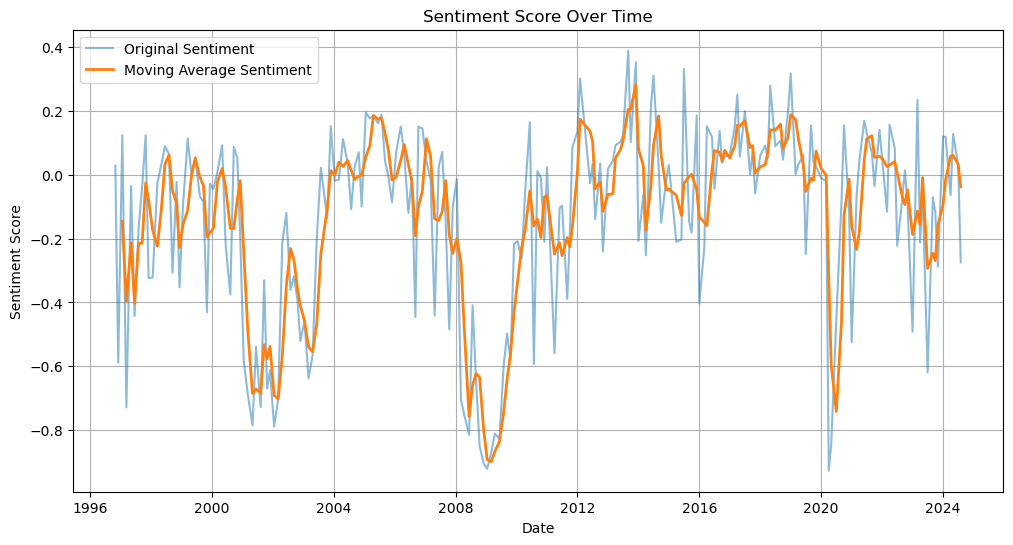

In [16]:
import matplotlib.pyplot as plt

# 绘制原始情感得分和移动平均
plt.figure(figsize=(12,6))
plt.plot(df.index, df['sentiment'], label='Original Sentiment', alpha=0.5)
plt.plot(df.index, df['sentiment_ma'], label='Moving Average Sentiment', linewidth=2)
plt.title('Sentiment Score Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.legend()
plt.grid(True)
plt.show()
